In [1]:
import os
import shutil
import pprint
import pandas as pd
import numpy as np
from pathlib import Path
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_colwidth', None)  # Display full content of each column

In [3]:
df_meta = pd.read_csv('csv/meta.csv')
df_meta.head()

,SeriesInstanceUID,StudyInstanceUID,Modality,SeriesDescription,BodyPartExamined,SeriesNumber,Collection,Visibility,ImageCount
0,1.3.6.1.4.1.9590.100.1.2.117041576511324414842508325652101471266,1.3.6.1.4.1.9590.100.1.2.229361142710768138411679379233064924540,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
1,1.3.6.1.4.1.9590.100.1.2.43873839610761788013224723323225482381,1.3.6.1.4.1.9590.100.1.2.195593486612988388325770883972107282733,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
2,1.3.6.1.4.1.9590.100.1.2.76741674113167646338262765132488965294,1.3.6.1.4.1.9590.100.1.2.257901172612530623323924356380431605062,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
3,1.3.6.1.4.1.9590.100.1.2.296931352612305599800425693833437698626,1.3.6.1.4.1.9590.100.1.2.109468616710242115222536802734027827120,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
4,1.3.6.1.4.1.9590.100.1.2.43665767012035310007732414810147712942,1.3.6.1.4.1.9590.100.1.2.380627129513562450304304820723973964760,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2


In [4]:
df_dicom = pd.read_csv('csv/dicom_info.csv')
df_dicom.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.dcm,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725036643043149877819,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.dcm,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612443997862211969669,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.267213171011171858918434139331210917771/1-032.dcm,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213171011171858918434139331210917771/1-032.jpg,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918434139331210917771,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701017460903623585574,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.381187369611524586537789902641525311317/1-052.dcm,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187369611524586537789902641525311317/1-052.jpg,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537789902641525311317,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440665960211609580159,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.381187369611524586537789902641525311317/2-204.dcm,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187369611524586537789902641525311317/2-204.jpg,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537789902641525311317,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440665960211609580159,NaN


In [5]:
df_dicom.SeriesDescription.unique()

array(['cropped images', 'full mammogram images', nan, 'ROI mask images'],
      dtype=object)

In [6]:
cropped_images = df_dicom[df_dicom.SeriesDescription=='cropped images'].image_path

In [7]:
full_mammo = df_dicom[df_dicom.SeriesDescription=='full mammogram images'].image_path

In [8]:
roi_img = df_dicom[df_dicom.SeriesDescription=='ROI mask images'].image_path

In [9]:
imdir = 'jpeg'

In [10]:
cropped_images = cropped_images.replace('CBIS-DDSM/jpeg', imdir, regex=True)
full_mammo = full_mammo.replace('CBIS-DDSM/jpeg', imdir, regex=True)
roi_img = roi_img.replace('CBIS-DDSM/jpeg', imdir, regex=True)

# view new paths
print('Cropped Images paths:\n')
print(cropped_images.iloc[0])
print('Full mammo Images paths:\n')
print(full_mammo.iloc[0])
print('ROI Mask Images paths:\n')
print(roi_img.iloc[0])

Cropped Images paths:

jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg
Full mammo Images paths:

jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg
ROI Mask Images paths:

jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/2-270.jpg


In [11]:
# organize image paths
full_mammo_dict = dict()
cropped_images_dict = dict()
roi_img_dict = dict()

for dicom in full_mammo:
    key = dicom.split("/")[0]
    full_mammo_dict[key] = dicom
for dicom in cropped_images:
    key = dicom.split("/")[0]
    cropped_images_dict[key] = dicom
for dicom in roi_img:
    key = dicom.split("/")[0]
    roi_img[key] = dicom

# view keys
next(iter((full_mammo_dict.items())))

('jpeg',
 'jpeg/1.3.6.1.4.1.9590.100.1.2.247594800112988856209160032211145354590/1-047.jpg')

In [12]:
# Load data
df_mass_test = pd.read_csv(r'csv/mass_case_description_test_set.csv')
df_mass_train = pd.read_csv(r'csv/mass_case_description_train_set.csv')

df_mass = pd.concat([df_mass_train, df_mass_test])
df_mass['image file path'] = df_mass['image file path'].str.replace('.dcm', '.jpg')
df_mass['cropped image file path'] = df_mass['cropped image file path'].str.replace('.dcm', '.jpg')

df_mass.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.422112722213189649807611434612228974994/1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515/000000.jpg,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.108268213011361124203859148071588939106/1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650/000000.jpg,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.108268213011361124203859148071588939106/1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650/000001.dcm\n
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.319478999311971442426185353560182990988/1.3.6.1.4.1.9590.100.1.2.359308329312397897125630708681441180834/000000.jpg,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.188473874511440575807446266233629582526/1.3.6.1.4.1.9590.100.1.2.227955274711225756835838775062793186053/000000.jpg,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.188473874511440575807446266233629582526/1.3.6.1.4.1.9590.100.1.2.227955274711225756835838775062793186053/000001.dcm\n
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.347107867812656628709864319310977895697/1.3.6.1.4.1.9590.100.1.2.89180046211022531834352631483669346540/000000.jpg,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.414182170112396175925115449620455230167/1.3.6.1.4.1.9590.100.1.2.429120414011832984817094399141838850375/000000.jpg,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.414182170112396175925115449620455230167/1.3.6.1.4.1.9590.100.1.2.429120414011832984817094399141838850375/000001.dcm\n
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.272600286511817402806912403581910920939/1.3.6.1.4.1.9590.100.1.2.295360926313492745441868049270168300162/000000.jpg,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.342549219112801262604988012930063078769/1.3.6.1.4.1.9590.100.1.2.115134232113001553100559896703407510515/000000.jpg,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.342549219112801262604988012930063078769/1.3.6.1.4.1.9590.100.1.2.115134232113001553100559896703407510515/000001.dcm\n
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.174047308712169195014610267031196524486/1.3.6.1.4.1.9590.100.1.2.410524754913057908920631336070876889890/000000.jpg,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.341142631111685501338932932302380583774/1.3.6.1.4.1.9590.100.1.2.12857366312625701203276284233604184846/000000.jpg,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.341142631111685501338932932302380583774/1.3.6.1.4.1.9590.100.1.2.12857366312625701203276284233604184846/000001.dcm\n


In [13]:
def keep_last_two_parts(path):
    parts = path.split('/')
    return '/' + '/'.join(parts[-2:])

df_mass['image file path'] = df_mass['image file path'].apply(keep_last_two_parts)
df_mass['cropped image file path'] = df_mass['cropped image file path'].apply(keep_last_two_parts)

base_dir = "C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg"

df_mass.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,/1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515/000000.jpg,/1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650/000000.jpg,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.108268213011361124203859148071588939106/1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650/000001.dcm\n
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,/1.3.6.1.4.1.9590.100.1.2.359308329312397897125630708681441180834/000000.jpg,/1.3.6.1.4.1.9590.100.1.2.227955274711225756835838775062793186053/000000.jpg,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.188473874511440575807446266233629582526/1.3.6.1.4.1.9590.100.1.2.227955274711225756835838775062793186053/000001.dcm\n
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,/1.3.6.1.4.1.9590.100.1.2.89180046211022531834352631483669346540/000000.jpg,/1.3.6.1.4.1.9590.100.1.2.429120414011832984817094399141838850375/000000.jpg,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.414182170112396175925115449620455230167/1.3.6.1.4.1.9590.100.1.2.429120414011832984817094399141838850375/000001.dcm\n
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,/1.3.6.1.4.1.9590.100.1.2.295360926313492745441868049270168300162/000000.jpg,/1.3.6.1.4.1.9590.100.1.2.115134232113001553100559896703407510515/000000.jpg,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.342549219112801262604988012930063078769/1.3.6.1.4.1.9590.100.1.2.115134232113001553100559896703407510515/000001.dcm\n
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,/1.3.6.1.4.1.9590.100.1.2.410524754913057908920631336070876889890/000000.jpg,/1.3.6.1.4.1.9590.100.1.2.12857366312625701203276284233604184846/000000.jpg,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.341142631111685501338932932302380583774/1.3.6.1.4.1.9590.100.1.2.12857366312625701203276284233604184846/000001.dcm\n


In [14]:
def prepend_base_dir(file_path):
    return os.path.join(base_dir, file_path.lstrip('/'))

df_mass['image file path'] = df_mass['image file path'].apply(prepend_base_dir)
df_mass['cropped image file path'] = df_mass['cropped image file path'].apply(prepend_base_dir)


df_mass.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515/000000.jpg,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650/000000.jpg,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.108268213011361124203859148071588939106/1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650/000001.dcm\n
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.359308329312397897125630708681441180834/000000.jpg,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.227955274711225756835838775062793186053/000000.jpg,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.188473874511440575807446266233629582526/1.3.6.1.4.1.9590.100.1.2.227955274711225756835838775062793186053/000001.dcm\n
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.89180046211022531834352631483669346540/000000.jpg,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.429120414011832984817094399141838850375/000000.jpg,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.414182170112396175925115449620455230167/1.3.6.1.4.1.9590.100.1.2.429120414011832984817094399141838850375/000001.dcm\n
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.295360926313492745441868049270168300162/000000.jpg,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.115134232113001553100559896703407510515/000000.jpg,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.342549219112801262604988012930063078769/1.3.6.1.4.1.9590.100.1.2.115134232113001553100559896703407510515/000001.dcm\n
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.410524754913057908920631336070876889890/000000.jpg,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.12857366312625701203276284233604184846/000000.jpg,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.341142631111685501338932932302380583774/1.3.6.1.4.1.9590.100.1.2.12857366312625701203276284233604184846/000001.dcm\n


In [15]:
def find_correct_filename(directory):
    try:
        files = os.listdir(directory)
        if files:
            return files[0]
    except FileNotFoundError:
        print(f"Directory not found: {directory}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return None

In [16]:
def correct_image_paths(df, base_dir):
    corrected_paths = []
    for _, row in df.iterrows():
        study_path = row['image file path']
        study_dir = os.path.join(base_dir, '/'.join(study_path.split('/')[:-1]))
        correct_filename = find_correct_filename(study_dir)
        if correct_filename:
            corrected_path = os.path.join(study_dir, correct_filename)
            corrected_paths.append(corrected_path)
        else:
            corrected_paths.append(None)
    return corrected_paths

df_mass['image file path'] = correct_image_paths(df_mass, base_dir)

df_mass.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515\1-211.jpg,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650/000000.jpg,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.108268213011361124203859148071588939106/1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650/000001.dcm\n
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.359308329312397897125630708681441180834\1-207.jpg,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.227955274711225756835838775062793186053/000000.jpg,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.188473874511440575807446266233629582526/1.3.6.1.4.1.9590.100.1.2.227955274711225756835838775062793186053/000001.dcm\n
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.89180046211022531834352631483669346540\1-250.jpg,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.429120414011832984817094399141838850375/000000.jpg,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.414182170112396175925115449620455230167/1.3.6.1.4.1.9590.100.1.2.429120414011832984817094399141838850375/000001.dcm\n
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.295360926313492745441868049270168300162\1-067.jpg,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.115134232113001553100559896703407510515/000000.jpg,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.342549219112801262604988012930063078769/1.3.6.1.4.1.9590.100.1.2.115134232113001553100559896703407510515/000001.dcm\n
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.410524754913057908920631336070876889890\1-056.jpg,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.12857366312625701203276284233604184846/000000.jpg,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.341142631111685501338932932302380583774/1.3.6.1.4.1.9590.100.1.2.12857366312625701203276284233604184846/000001.dcm\n


In [17]:
def correct_image_paths(df, base_dir):
    corrected_paths = []
    for _, row in df.iterrows():
        study_path = row['cropped image file path']
        study_dir = os.path.join(base_dir, '/'.join(study_path.split('/')[:-1]))
        correct_filename = find_correct_filename(study_dir)
        if correct_filename:
            corrected_path = os.path.join(study_dir, correct_filename)
            corrected_paths.append(corrected_path)
        else:
            corrected_paths.append(None)
    return corrected_paths

df_mass['cropped image file path'] = correct_image_paths(df_mass, base_dir)

df_mass.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515\1-211.jpg,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650\1-250.jpg,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.108268213011361124203859148071588939106/1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650/000001.dcm\n
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.359308329312397897125630708681441180834\1-207.jpg,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.227955274711225756835838775062793186053\1-289.jpg,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.188473874511440575807446266233629582526/1.3.6.1.4.1.9590.100.1.2.227955274711225756835838775062793186053/000001.dcm\n
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.89180046211022531834352631483669346540\1-250.jpg,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.429120414011832984817094399141838850375\1-296.jpg,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.414182170112396175925115449620455230167/1.3.6.1.4.1.9590.100.1.2.429120414011832984817094399141838850375/000001.dcm\n
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.295360926313492745441868049270168300162\1-067.jpg,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.115134232113001553100559896703407510515\1-245.jpg,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.342549219112801262604988012930063078769/1.3.6.1.4.1.9590.100.1.2.115134232113001553100559896703407510515/000001.dcm\n
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.410524754913057908920631336070876889890\1-056.jpg,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.12857366312625701203276284233604184846\1-182.jpg,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.341142631111685501338932932302380583774/1.3.6.1.4.1.9590.100.1.2.12857366312625701203276284233604184846/000001.dcm\n


In [18]:
# Filter views
def filter_views(df, view_list=['CC', 'MLO']):
    return df[df['image view'].isin(view_list)]

df_mass_filtered = filter_views(df_mass)
df_mass_filtered = df_mass_filtered.dropna(subset=['image file path'])

# Group by patient ID and ensure both CC and MLO views are present
df_mass_filtered = df_mass_filtered.groupby('patient_id').filter(lambda x: len(x['image view'].unique()) == 2)

df_mass_filtered.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515\1-211.jpg,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650\1-250.jpg,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.108268213011361124203859148071588939106/1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650/000001.dcm\n
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.359308329312397897125630708681441180834\1-207.jpg,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.227955274711225756835838775062793186053\1-289.jpg,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.188473874511440575807446266233629582526/1.3.6.1.4.1.9590.100.1.2.227955274711225756835838775062793186053/000001.dcm\n
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.89180046211022531834352631483669346540\1-250.jpg,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.429120414011832984817094399141838850375\1-296.jpg,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.414182170112396175925115449620455230167/1.3.6.1.4.1.9590.100.1.2.429120414011832984817094399141838850375/000001.dcm\n
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.295360926313492745441868049270168300162\1-067.jpg,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.115134232113001553100559896703407510515\1-245.jpg,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.342549219112801262604988012930063078769/1.3.6.1.4.1.9590.100.1.2.115134232113001553100559896703407510515/000001.dcm\n
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.410524754913057908920631336070876889890\1-056.jpg,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.12857366312625701203276284233604184846\1-182.jpg,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.341142631111685501338932932302380583774/1.3.6.1.4.1.9590.100.1.2.12857366312625701203276284233604184846/000001.dcm\n


In [19]:
df_mass_filtered.isnull().sum()

patient_id                  0
breast_density              0
left or right breast        0
image view                  0
abnormality id              0
abnormality type            0
mass shape                  4
mass margins               51
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [20]:
print(df_mass_filtered.columns)
print('\n')
# rename columns
df_mass_filtered = df_mass_filtered.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

# view renamed columns
df_mass_filtered.columns

Index(['patient_id', 'breast_density', 'left or right breast', 'image view',
       'abnormality id', 'abnormality type', 'mass shape', 'mass margins',
       'assessment', 'pathology', 'subtlety', 'image file path',
       'cropped image file path', 'ROI mask file path'],
      dtype='object')




Index(['patient_id', 'breast_density', 'left_or_right_breast', 'image_view',
       'abnormality_id', 'abnormality_type', 'mass_shape', 'mass_margins',
       'assessment', 'pathology', 'subtlety', 'image_file_path',
       'cropped_image_file_path', 'ROI_mask_file_path'],
      dtype='object')

In [21]:
# fill in missing values using the backwards fill method
df_mass_filtered['mass_margins'] = df_mass_filtered['mass_margins'].fillna(method='bfill')
df_mass_filtered['mass_shape'] = df_mass_filtered['mass_shape'].fillna(method='bfill')

#check null values
df_mass_filtered.isnull().sum()

C:\Users\shash\AppData\Local\Temp\ipykernel_22676\4217686667.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_mass_filtered['mass_margins'] = df_mass_filtered['mass_margins'].fillna(method='bfill')
C:\Users\shash\AppData\Local\Temp\ipykernel_22676\4217686667.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_mass_filtered['mass_shape'] = df_mass_filtered['mass_shape'].fillna(method='bfill')


patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
ROI_mask_file_path         0
dtype: int64

In [22]:
df_mass_filtered.head()

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515\1-211.jpg,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650\1-250.jpg,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.108268213011361124203859148071588939106/1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650/000001.dcm\n
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.359308329312397897125630708681441180834\1-207.jpg,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.227955274711225756835838775062793186053\1-289.jpg,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.188473874511440575807446266233629582526/1.3.6.1.4.1.9590.100.1.2.227955274711225756835838775062793186053/000001.dcm\n
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.89180046211022531834352631483669346540\1-250.jpg,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.429120414011832984817094399141838850375\1-296.jpg,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.414182170112396175925115449620455230167/1.3.6.1.4.1.9590.100.1.2.429120414011832984817094399141838850375/000001.dcm\n
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.295360926313492745441868049270168300162\1-067.jpg,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.115134232113001553100559896703407510515\1-245.jpg,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.342549219112801262604988012930063078769/1.3.6.1.4.1.9590.100.1.2.115134232113001553100559896703407510515/000001.dcm\n
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.410524754913057908920631336070876889890\1-056.jpg,C:/Users/shash/OneDrive/Documents/Master's/DSCI Capstone Project/archive/jpeg\1.3.6.1.4.1.9590.100.1.2.12857366312625701203276284233604184846\1-182.jpg,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.341142631111685501338932932302380583774/1.3.6.1.4.1.9590.100.1.2.12857366312625701203276284233604184846/000001.dcm\n


Full Mammograms:



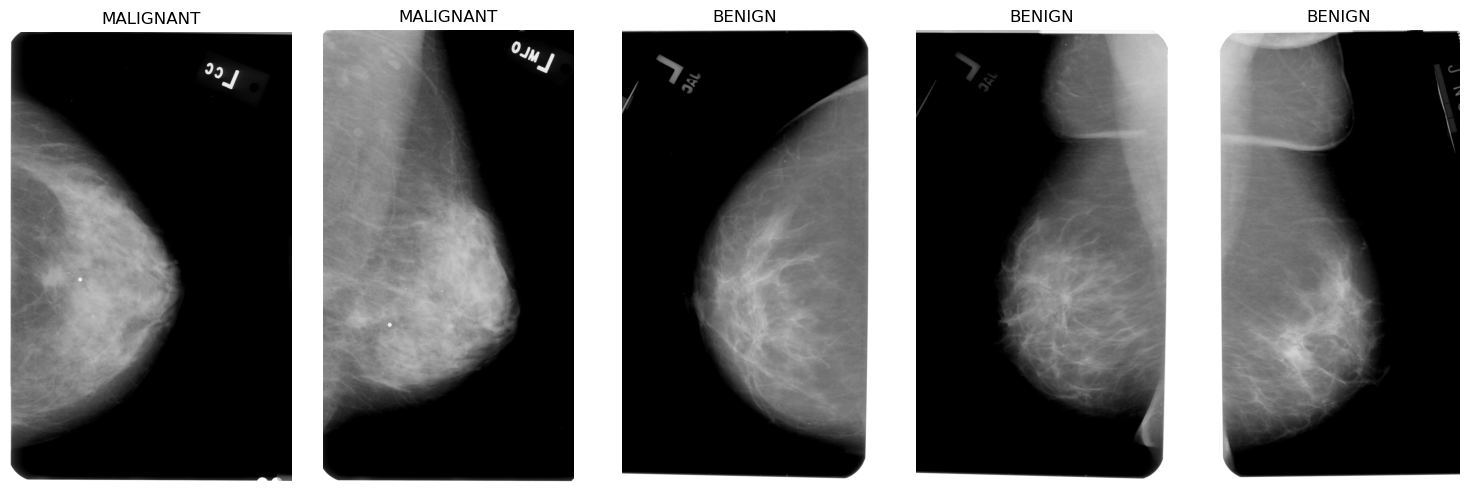

In [23]:
# Display some images
import matplotlib.image as mpimg

# create function to display images
def display_images(column, number):
    """displays images in dataset"""
    # create figure and axes
    number_to_visualize = number
    rows = 1
    cols = number_to_visualize
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5))
    
    # Loop through rows and display images
    for index, row in df_mass_filtered.head(number_to_visualize).iterrows():
        image_path = row[column]
        image = mpimg.imread(image_path)
        ax = axes[index]
        ax.imshow(image, cmap='gray')
        ax.set_title(f"{row['pathology']}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
print('Full Mammograms:\n')
display_images('image_file_path', 5)
#print('Cropped Mammograms:\n')
#display_images('cropped_image_file_path', 5)

In [24]:
import tensorflow as tf
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

def image_processor(image_path, target_size):
    """Preprocess images for CNN model"""
    absolute_image_path = os.path.abspath(image_path)
    image = cv2.imread(absolute_image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (target_size[1], target_size[0]))
    image_array = image / 255.0
    return image_array

# Merge datasets
#full_mass = pd.concat([mass_train, mass_test], axis=0)

# Define the target size
target_size = (224, 224, 3)

# Apply preprocessor to train data
df_mass_filtered['processed_images'] = df_mass_filtered['image_file_path'].apply(lambda x: image_processor(x, target_size))

# Create a binary mapper
class_mapper = {'MALIGNANT': 1, 'BENIGN': 0, 'BENIGN_WITHOUT_CALLBACK': 0} 

# Convert the processed_images column to an array
X_resized = np.array(df_mass_filtered['processed_images'].tolist())

# Apply class mapper to pathology column
df_mass_filtered['labels'] = df_mass_filtered['pathology'].replace(class_mapper)

# Check the number of classes
num_classes = len(df_mass_filtered['labels'].unique())

# Split data into train, test, and validation sets (70, 20, 10)
X_train, X_temp, y_train, y_temp = train_test_split(X_resized, df_mass_filtered['labels'].values, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

# Convert integer labels to one-hot encoded labels
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_val = to_categorical(y_val, num_classes)

C:\Users\shash\AppData\Local\Temp\ipykernel_22676\3799931255.py:31: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_mass_filtered['labels'] = df_mass_filtered['pathology'].replace(class_mapper)


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [26]:
# Define the ANN model
image_size = 64
ann_model = Sequential([
    Flatten(input_shape=(image_size, image_size, 3)),  # Flatten layer to convert 2D image data to 1D
    Dense(128, activation='relu'),  # Fully connected layer with 128 neurons and ReLU activation
    Dropout(0.5),  # Dropout layer with dropout rate of 0.5 to prevent overfitting
    Dense(64, activation='relu'),  # Fully connected layer with 64 neurons and ReLU activation
    Dropout(0.5),  # Dropout layer with dropout rate of 0.5
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])


C:\Users\shash\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
ann_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
ann_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 12288)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,572,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,581,313 (6.03 MB)

 Trainable params: 1,581,313 (6.03 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define your neural network architecture
def create_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),  # Input layer
        layers.Dense(128, activation='relu'),  # Hidden layer
        layers.Dense(10, activation='softmax')  # Output layer
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Example data (replace this with your actual data loading code)
(train_images, train_labels), (val_images, val_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images / 255.0
val_images = val_images / 255.0

# Hyperparameters
epochs = 10
batch_size = 32

# Create and train the model
try:
    ann_model = create_model()
    ann_history = ann_model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(val_images, val_labels))
except Exception as e:
    print("An error occurred during training:", e)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8773 - loss: 0.4287 - val_accuracy: 0.9588 - val_loss: 0.1438
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9614 - loss: 0.1298 - val_accuracy: 0.9698 - val_loss: 0.0977
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9766 - loss: 0.0782 - val_accuracy: 0.9726 - val_loss: 0.0892
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9820 - loss: 0.0592 - val_accuracy: 0.9759 - val_loss: 0.0796
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9873 - loss: 0.0425 - val_accuracy: 0.9768 - val_loss: 0.0731
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9901 - loss: 0.0335 - val_accuracy: 0.9781 - val_loss: 0.0748
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9919 - loss: 0.0273 - val_accuracy: 0.9774 - val_loss: 0.0746
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9941 - loss: 0.0204 - 

In [30]:
# Evaluate the model on the validation data
evaluation = ann_model.evaluate(val_images, val_labels)

# Print the evaluation results
print("Evaluation Loss:", evaluation[0])
print("Evaluation Accuracy:", evaluation[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.9704 - loss: 0.1059
Evaluation Loss: 0.08543237298727036
Evaluation Accuracy: 0.9761000275611877


In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Get predictions on the validation data
val_predictions = ann_model.predict(val_images)
val_predictions_classes = np.argmax(val_predictions, axis=1)

# Calculate Precision, Recall, and F1 Score
precision = precision_score(val_labels, val_predictions_classes, average='weighted')
recall = recall_score(val_labels, val_predictions_classes, average='weighted')
f1 = f1_score(val_labels, val_predictions_classes, average='weighted')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step
Precision: 0.9762083757942506
Recall: 0.9761
F1 Score: 0.9760944674607608


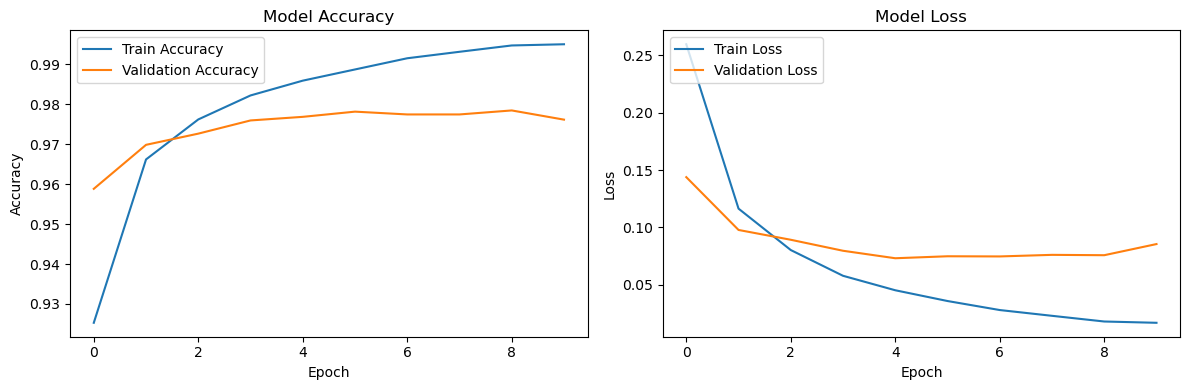

In [32]:
import matplotlib.pyplot as plt

# Function to plot training & validation accuracy and loss
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    
    plt.tight_layout()
    plt.show()

# Call the function to plot the training history
plot_training_history(ann_history)